In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#path = kagglehub.dataset_download("prajwaldongre/loan-application-and-transaction-fraud-detection")

In [3]:
df1 = pd.read_csv("/home/mousefish/.cache/kagglehub/datasets/prajwaldongre/loan-application-and-transaction-fraud-detection/versions/1/loan_applications.csv")  # уточните название файла

In [4]:
df2 = pd.read_csv("/home/mousefish/.cache/kagglehub/datasets/prajwaldongre/loan-application-and-transaction-fraud-detection/versions/1/transactions.csv")  # уточните название файла

In [5]:
# Первые 5 строк
print(df1.head())

                         application_id customer_id application_date  \
0  c8bf0bea-70e6-4870-9125-41b8210c527f  CUST109427       2023-04-09   
1  91224cec-3544-4bc7-ac15-a9792da54c02  CUST106146       2023-09-23   
2  4efcd02d-4a03-4ab7-9bd1-0ff430493d0c  CUST100674       2023-05-22   
3  a61337d4-ba04-4a68-b492-2cb8266e6ed7  CUST106466       2024-07-09   
4  a8d1639e-170b-41b2-826a-55c7dae38d16  CUST112319       2023-11-20   

        loan_type  loan_amount_requested  loan_tenure_months  \
0   Business Loan               604000.0                  12   
1        Car Loan               100000.0                 240   
2  Education Loan               431000.0                  60   
3        Car Loan               324000.0                 120   
4   Personal Loan               100000.0                  36   

   interest_rate_offered     purpose_of_loan employment_status  \
0                  11.66   Medical Emergency           Retired   
1                  13.62           Education      

In [6]:
df1.describe()

loan_amount_requested  loan_tenure_months  interest_rate_offered  \
count           5.000000e+04          50000.0000           50000.000000   
mean            5.139130e+05            121.3884              10.528547   
std             2.752126e+05            121.4104               1.926442   
min             1.000000e+05             12.0000               7.000000   
25%             3.000000e+05             24.0000               9.150000   
50%             5.030000e+05             60.0000              10.510000   
75%             7.010000e+05            240.0000              11.850000   
max             1.618000e+06            360.0000              19.620000   

       monthly_income   cibil_score  existing_emis_monthly  \
count    50000.000000  50000.000000             50000.0000   
mean     50844.940000    699.149760              3066.3620   
std      23874.742237     49.920325              1896.9745   
min      10000.000000    476.000000                 0.0000   
25%      33600.000000    665.000000              1700.0000   
50%      50300.000000    699.000000              3000.0000   
75%      67300.000000    733.000000              4400.0000   
max     162000.000000    888.000000             11400.0000   

       debt_to_income_ratio  applicant_age  number_of_dependents    fraud_flag  
count          50000.000000   50000.000000          50000.000000  50000.000000  
mean               8.573188      43.060880              2.012280      0.020520  
std                9.587649      12.970254              1.408761      0.141772  
min                0.000000      21.000000              0.000000      0.000000  
25%                3.090000      32.000000              1.000000      0.000000  
50%                5.950000      43.000000              2.000000      0.000000  
75%               10.292500      54.000000              3.000000      0.000000  
max              102.000000      65.000000              4.000000      1.000000

In [7]:
# Первые 5 строк
print(df2.head())

                         transaction_id customer_id     transaction_date  \
0  2d7ddfd4-1112-4354-a2dd-fad94b45a850  CUST102188  2022-01-04 11:27:00   
1  ba998721-a612-4e0a-8354-46d001e9c39c  CUST107144  2022-01-03 23:52:00   
2  0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6  CUST102126  2022-01-15 06:54:00   
3  c4fce988-34c5-48db-8686-bfad0b3bc0b5  CUST109887  2022-01-08 07:57:00   
4  f9b8ca30-00e5-4322-8cff-eac0554cf2da  CUST108620  2022-01-02 10:43:00   

    transaction_type  transaction_amount merchant_category  \
0       Bill Payment              2100.0            Dining   
1                UPI              1400.0            Travel   
2         Debit Card              1000.0     Entertainment   
3        Credit Card             10500.0         Utilities   
4  Loan Disbursement              8100.0       Electronics   

                   merchant_name          transaction_location  \
0       Rattan, Khanna and Magar  Srikakulam, Himachal Pradesh   
1                    Chauhan LLC      

In [8]:
df2.describe()

transaction_amount  account_balance_after_transaction  \
count        50000.000000                       50000.000000   
mean          5005.674329                       21930.235669   
std           5070.810305                       14621.954095   
min            100.000000                           0.000000   
25%           1400.000000                        9237.000000   
50%           3461.505910                       21586.500000   
75%           6900.000000                       33994.250000   
max          76531.610223                       89097.000000   

       is_international_transaction    fraud_flag  
count                  50000.000000  50000.000000  
mean                       0.010440      0.010040  
std                        0.101643      0.099697  
min                        0.000000      0.000000  
25%                        0.000000      0.000000  
50%                        0.000000      0.000000  
75%                        0.000000      0.000000  
max                        1.000000      1.000000

In [9]:
# Основная информация о данных
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [10]:
# Основная информация о данных
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     50000 non-null  object 
 1   customer_id                        50000 non-null  object 
 2   transaction_date                   50000 non-null  object 
 3   transaction_type                   50000 non-null  object 
 4   transaction_amount                 50000 non-null  float64
 5   merchant_category                  50000 non-null  object 
 6   merchant_name                      50000 non-null  object 
 7   transaction_location               50000 non-null  object 
 8   account_balance_after_transaction  50000 non-null  float64
 9   is_international_transaction       50000 non-null  int64  
 10  device_used                        50000 non-null  object 
 11  ip_address                         50000 non-null  obj

In [11]:
# Выбор категориальных столбцов
cat_columns1 = [
    'loan_type',
    'purpose_of_loan',
    'employment_status',
    'property_ownership_status',
    'gender',
    'loan_status'
]
cat_columns1 = df1[cat_columns1]
# Выбор числовых столбцов 
numeric_columns1 = df1.select_dtypes(include=['float64','int64']).columns.drop(['fraud_flag'])
mean_values1 = df1[numeric_columns1].mean()
print(mean_values1)

loan_amount_requested    513913.040000
loan_tenure_months          121.388400
interest_rate_offered        10.528547
monthly_income            50844.940000
cibil_score                 699.149760
existing_emis_monthly      3066.362000
debt_to_income_ratio          8.573188
applicant_age                43.060880
number_of_dependents          2.012280
dtype: float64


In [12]:
# Выбор числовых столбцов
numeric_columns2 = df2.select_dtypes(include=['float64']).columns
mean_values2 = df2[numeric_columns2].mean()
print(mean_values2)

transaction_amount                    5005.674329
account_balance_after_transaction    21930.235669
dtype: float64


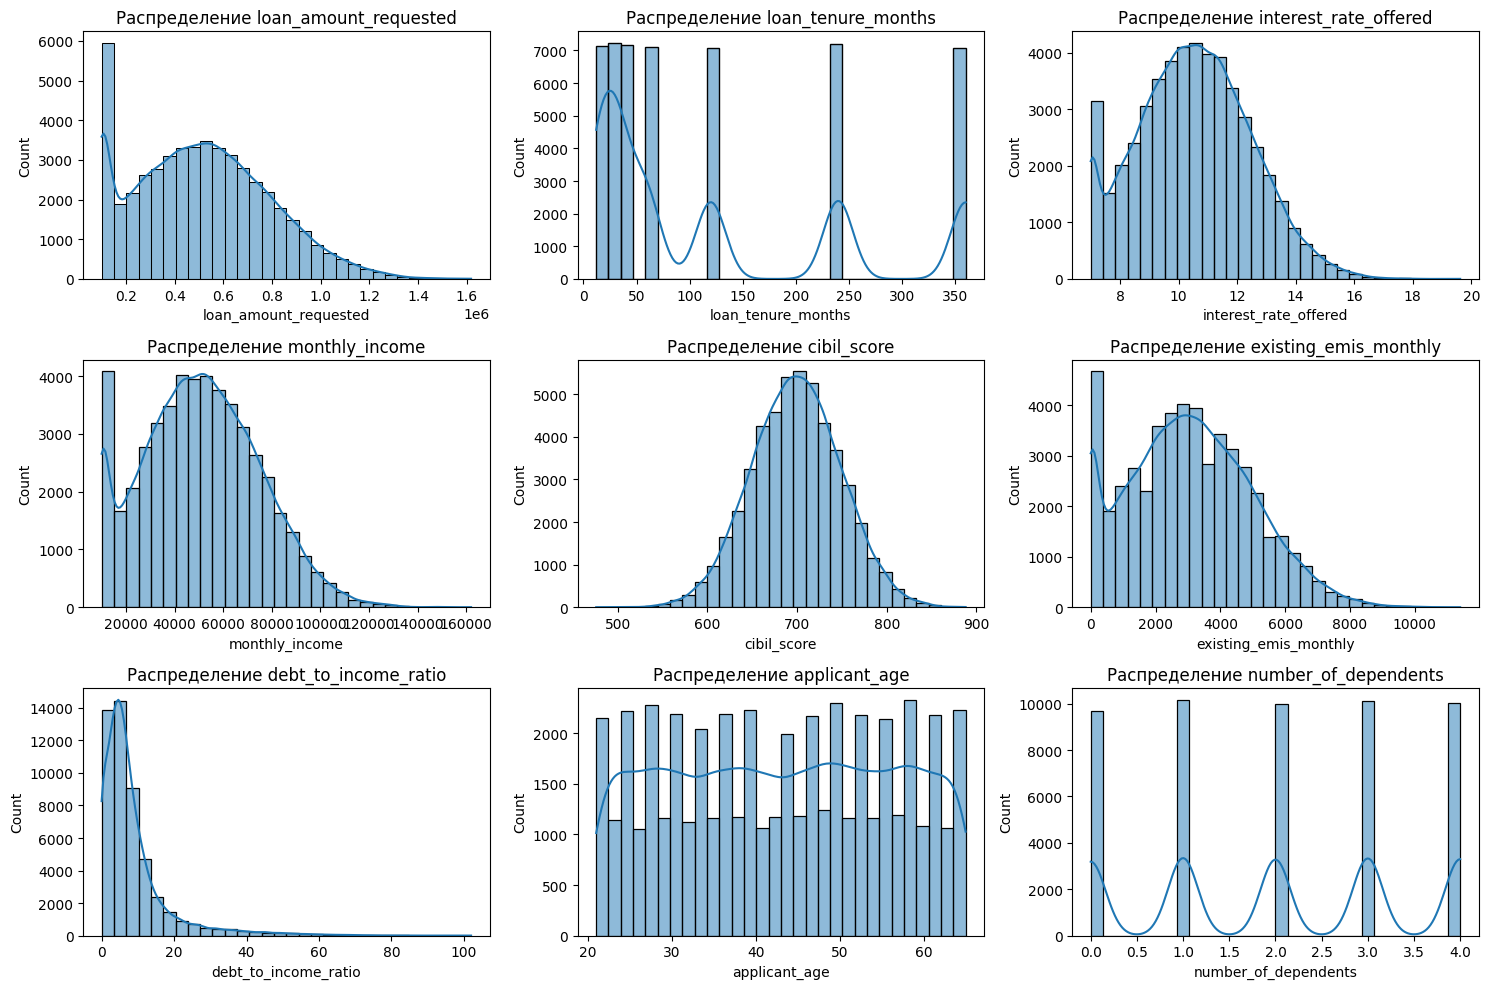

In [13]:
# Строим гистограммы для каждого числового столбца
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns1, 1):
    plt.subplot(3, 3, i)  # 3 строки, 3 столбца (подбирается под количество столбцов)
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.tight_layout()
plt.show()

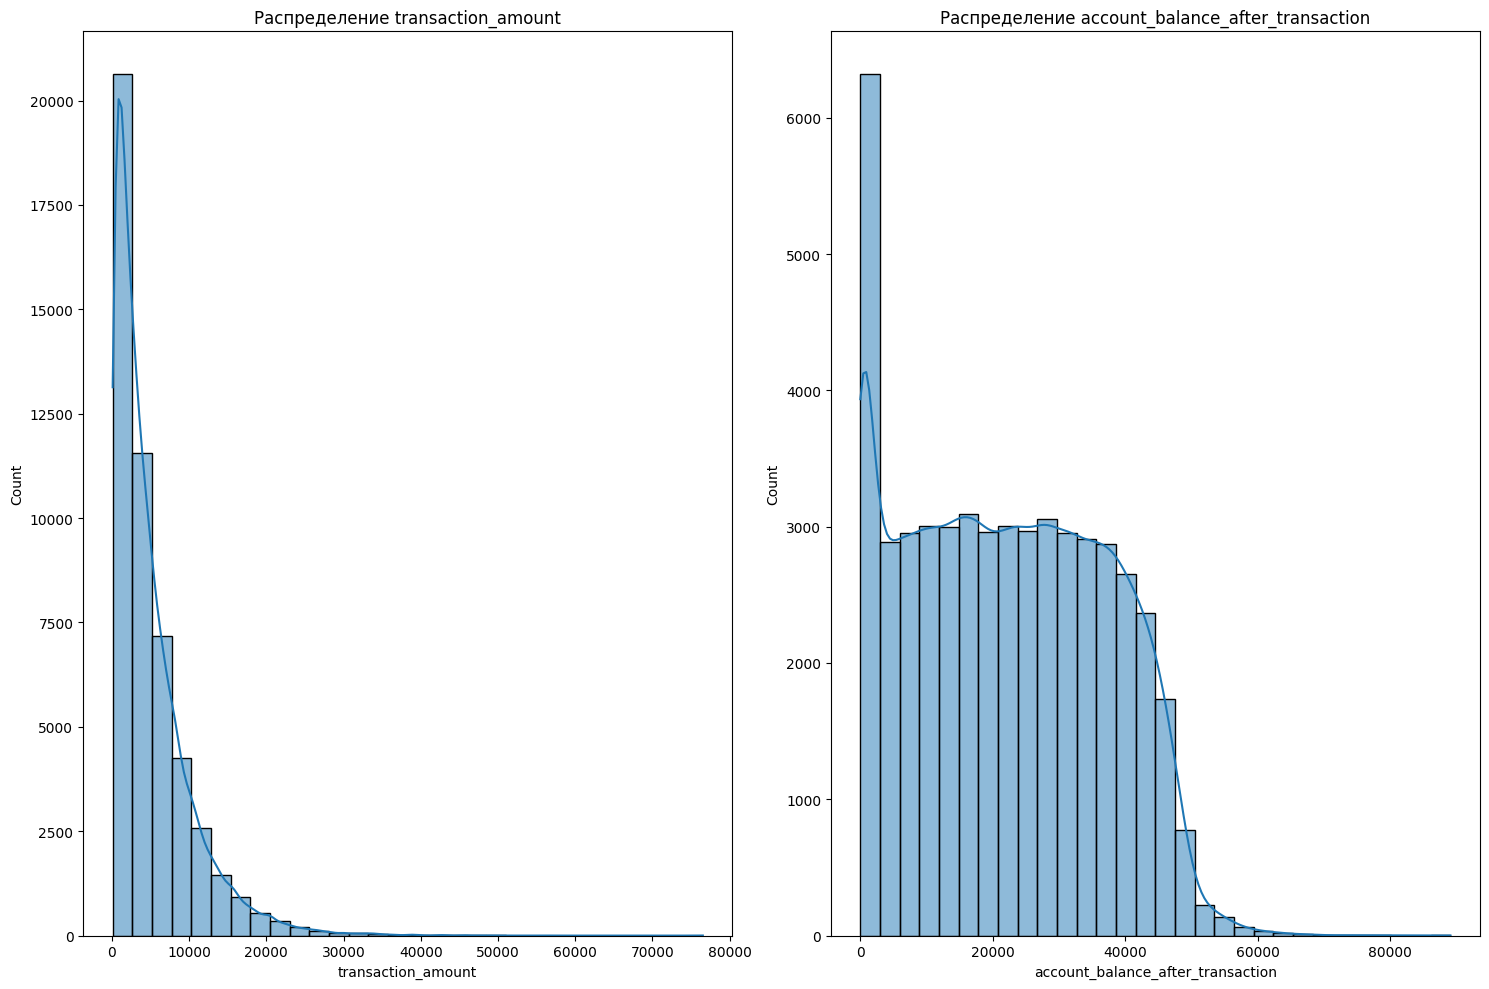

In [14]:
# Строим гистограммы для каждого числового столбца
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns2, 1):
    plt.subplot(1, 2, i)  # 1 строки, 1 столбца (подбирается под количество столбцов)
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.tight_layout()
plt.show()

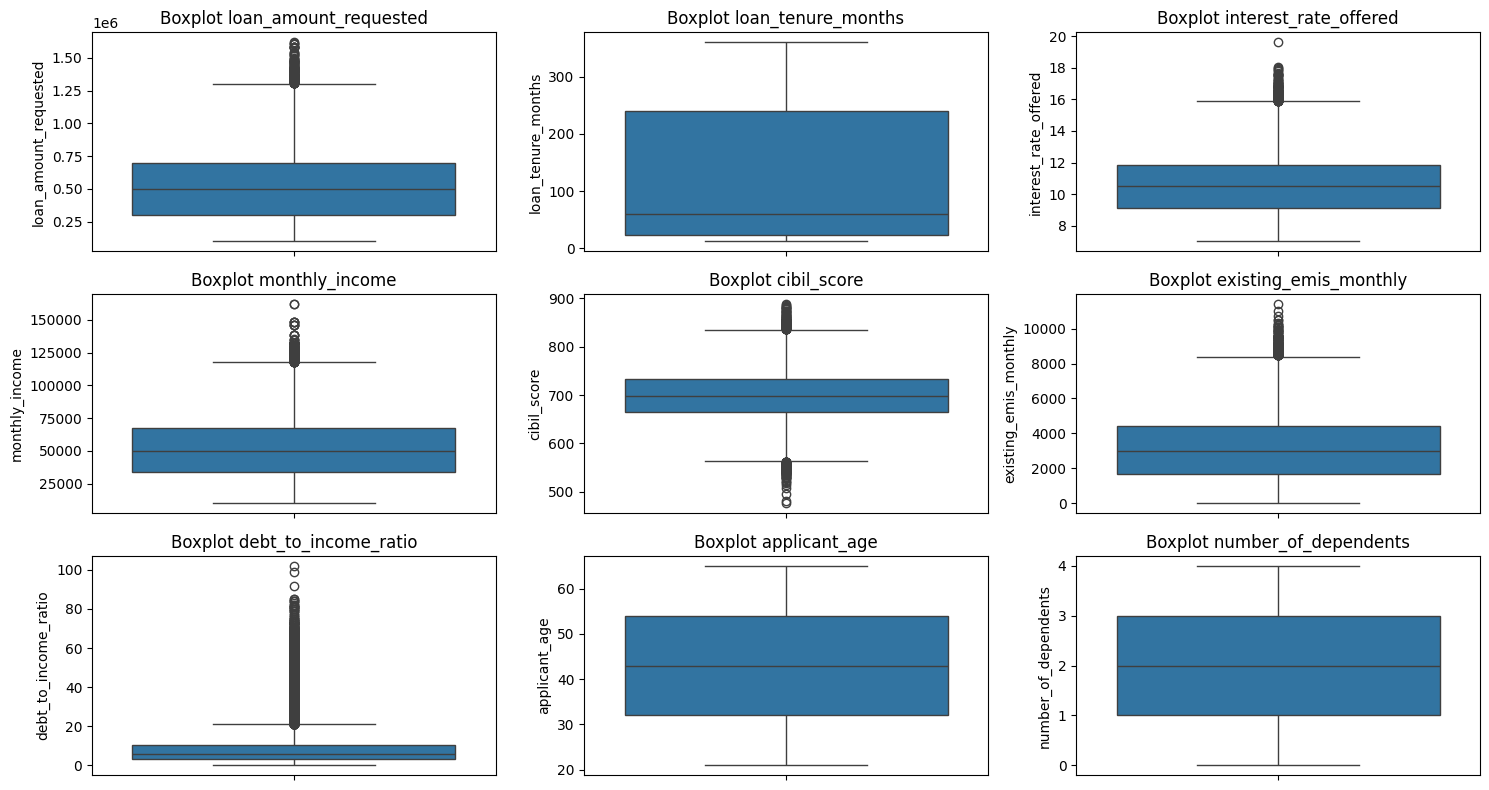

In [15]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns1, 1):
    plt.subplot(3, 3, i)  # 3 строки, 3 столбцов (подбирается под количество столбцов)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()

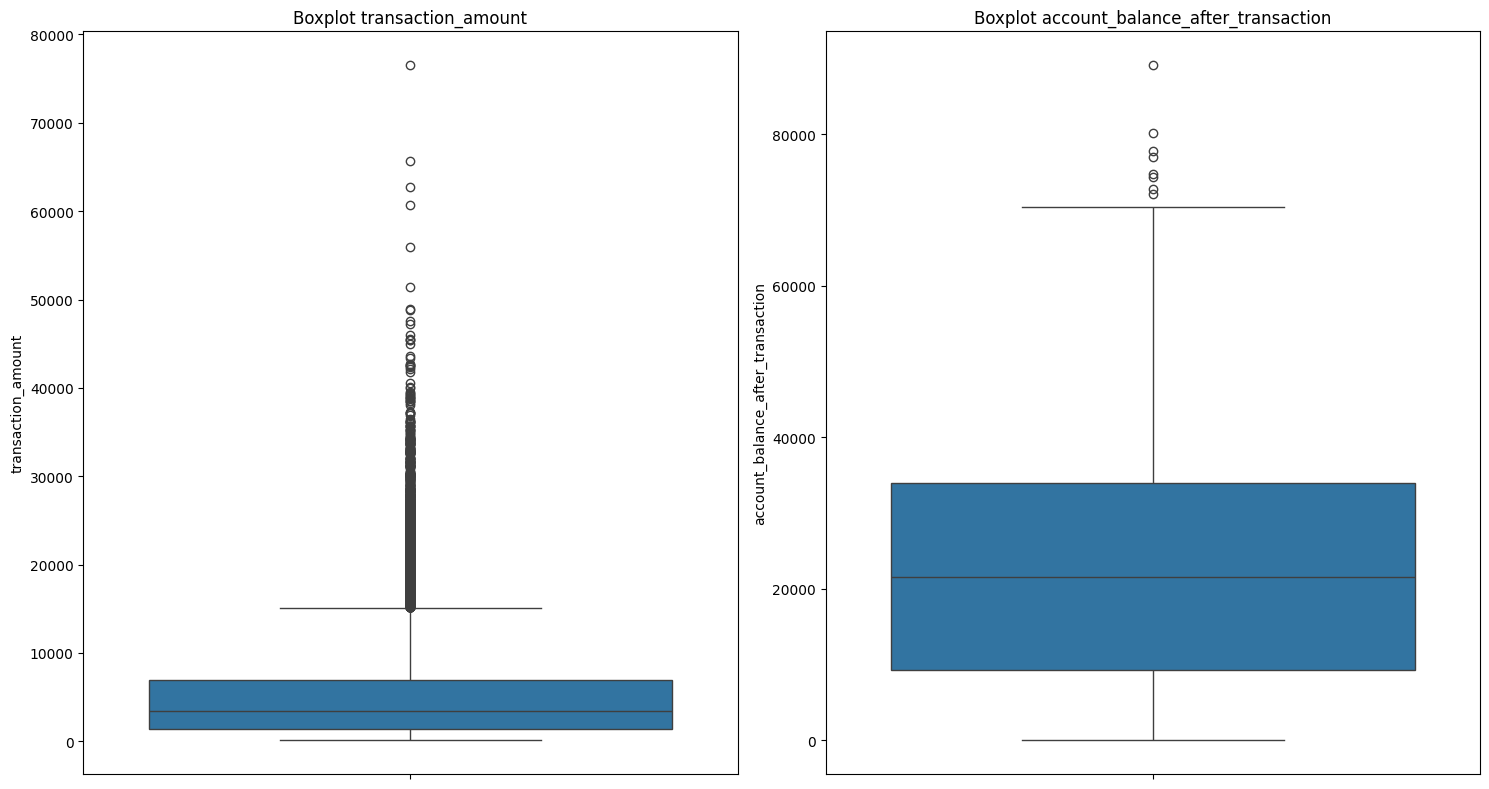

In [16]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns2, 1):
    plt.subplot(1, 2, i)  # 2 строки, 5 столбцов (подбирается под количество столбцов)
    sns.boxplot(y=df2[col])
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()

In [17]:
for col in numeric_columns1:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    print(f"Выбросы в {col}: {len(outliers)} ({(len(outliers)/len(df1))*100:.2f}%)")

Выбросы в loan_amount_requested: 156 (0.31%)
Выбросы в loan_tenure_months: 0 (0.00%)
Выбросы в interest_rate_offered: 162 (0.32%)
Выбросы в monthly_income: 194 (0.39%)
Выбросы в cibil_score: 312 (0.62%)
Выбросы в existing_emis_monthly: 161 (0.32%)
Выбросы в debt_to_income_ratio: 3973 (7.95%)
Выбросы в applicant_age: 0 (0.00%)
Выбросы в number_of_dependents: 0 (0.00%)


In [18]:
for col in numeric_columns2:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    print(f"Выбросы в {col}: {len(outliers)} ({(len(outliers)/len(df1))*100:.2f}%)")

Выбросы в transaction_amount: 2443 (4.89%)
Выбросы в account_balance_after_transaction: 8 (0.02%)


In [19]:
print("Общее количество пропусков датасет 1:")
print(df1.isnull().sum().sum())

Общее количество пропусков датасет 1:
48974


In [20]:
print("Общее количество пропусков датасет 2:")
print(df2.isnull().sum().sum())

Общее количество пропусков датасет 2:
0


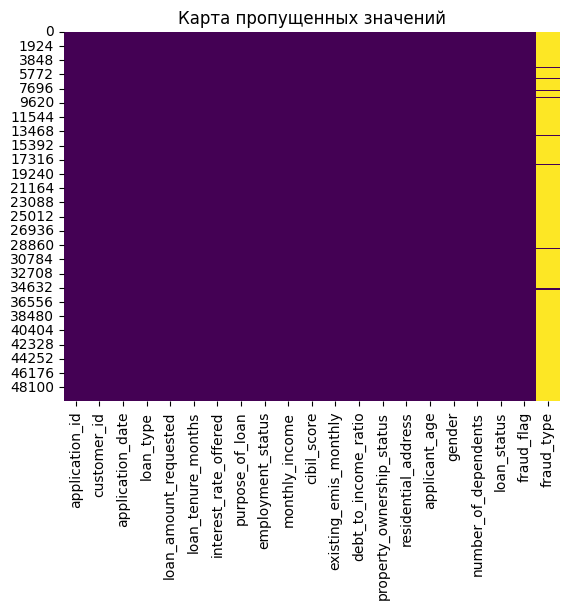

In [21]:
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title("Карта пропущенных значений")
plt.show()

In [22]:
total_fraud_cases = df1['fraud_flag'].sum()
fraud_with_type = df1[df1['fraud_flag'] == 1]['fraud_type'].notna().sum()
if total_fraud_cases == fraud_with_type:
    print("✅ ВСЕ мошеннические заявки имеют заполненный fraud_type")
else:
    missing = total_fraud_cases - fraud_with_type
    print(f"❌ {missing} заявок с fraud_flag=1 не имеют fraud_type")

✅ ВСЕ мошеннические заявки имеют заполненный fraud_type


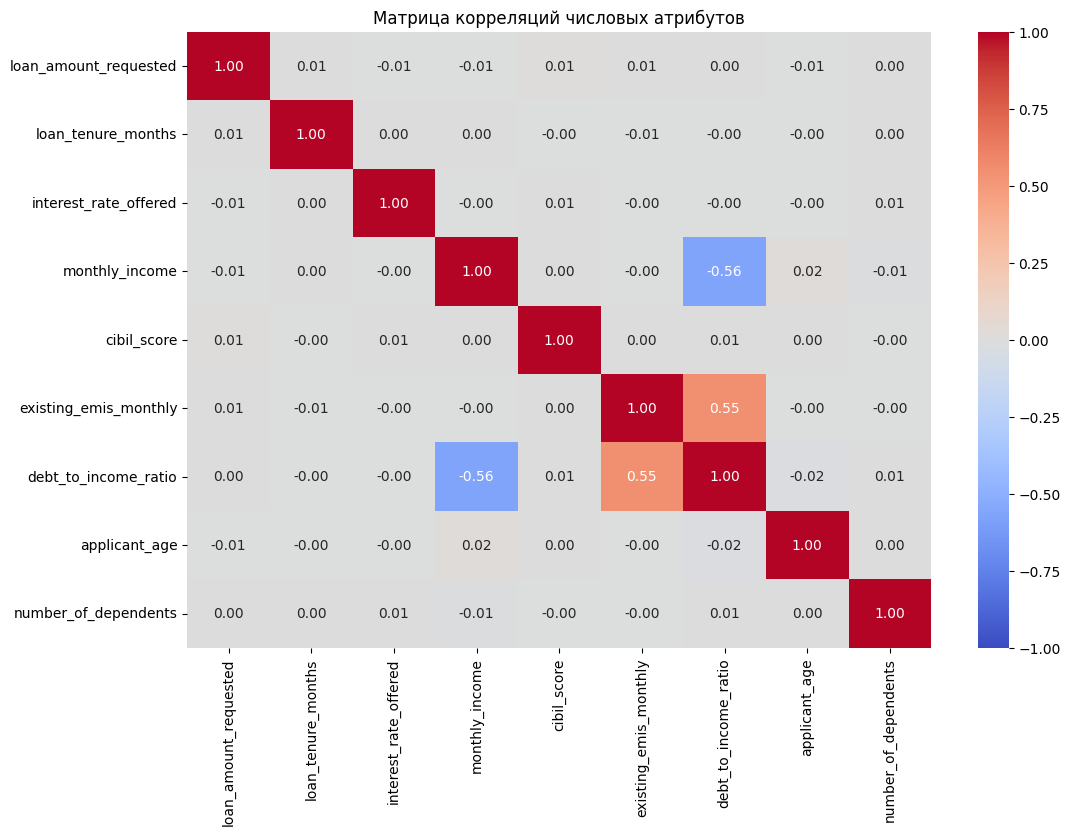

In [23]:
# Строим тепловую карту корреляций
plt.figure(figsize=(12, 8))
corr_matrix = df1[numeric_columns1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Матрица корреляций числовых атрибутов")
plt.show()

In [24]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:  # Порог корреляции
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Высококоррелированные пары (>0.5):")
print(high_corr_pairs)

Высококоррелированные пары (>0.5):
[('debt_to_income_ratio', 'monthly_income'), ('debt_to_income_ratio', 'existing_emis_monthly')]


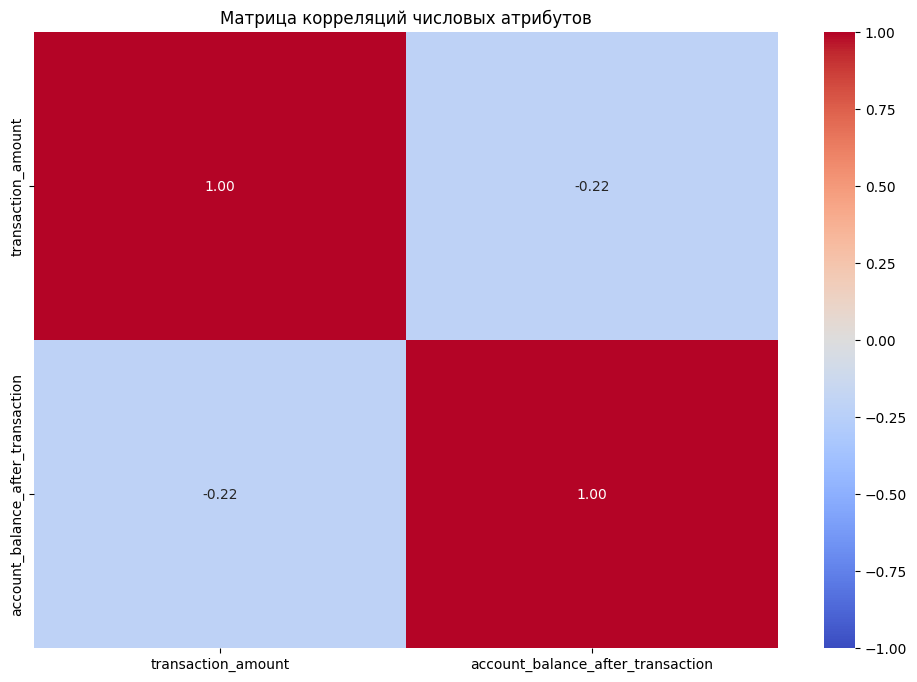

In [25]:
# Строим тепловую карту корреляций
plt.figure(figsize=(12, 8))
corr_matrix = df2[numeric_columns2].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Матрица корреляций числовых атрибутов")
plt.show()

In [26]:
pd.crosstab(df1['employment_status'], df1['fraud_flag'])

fraud_flag            0    1
employment_status           
Business Owner     8114  159
Retired            8383  151
Salaried           8321  196
Self-Employed      8044  192
Student            7940  145
Unemployed         8172  183

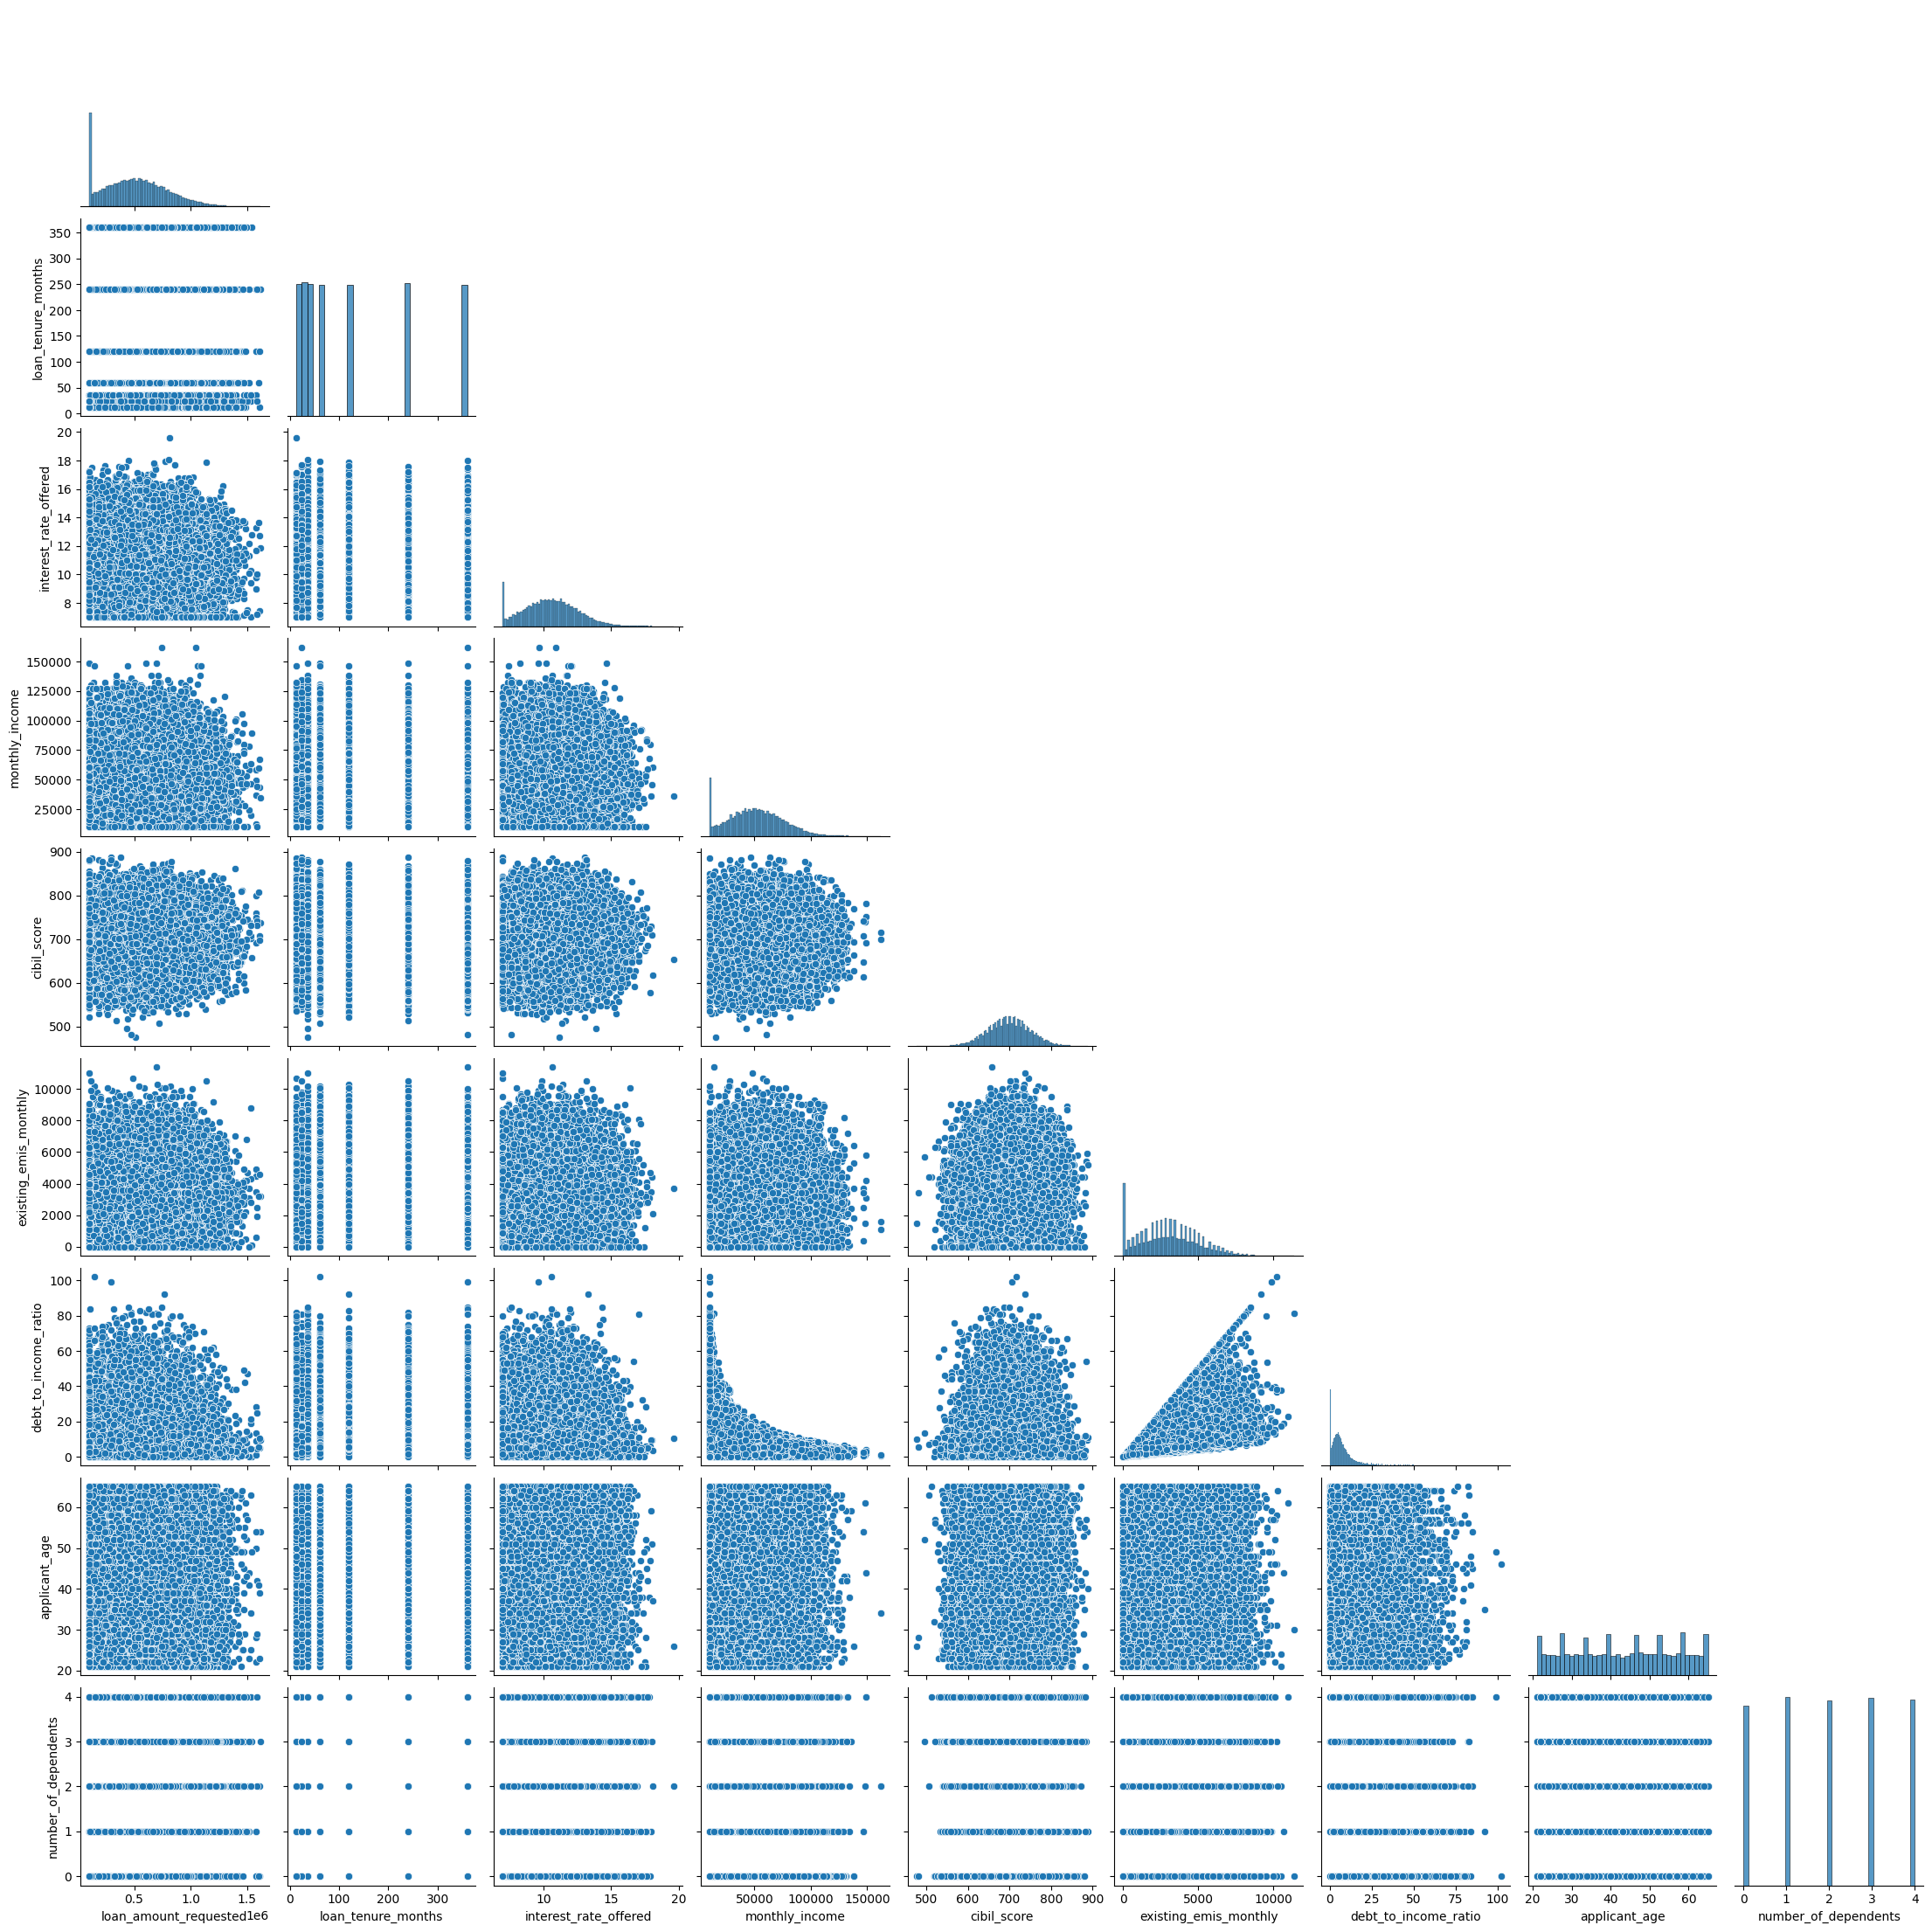

In [27]:
sns.pairplot(df1[numeric_columns1], corner=True)
plt.show()

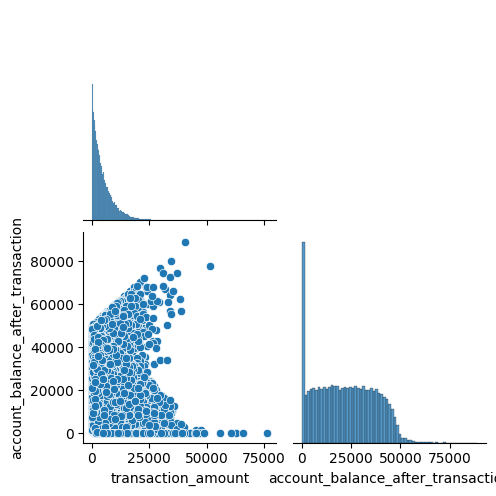

In [28]:
sns.pairplot(df2[numeric_columns2], corner=True)
plt.show()

In [29]:
from scipy.stats import pointbiserialr

In [30]:
corr, p_value = pointbiserialr(df1['fraud_flag'], df1['loan_amount_requested'])
print(f"Корреляция fraud_flag и loan_amount: {corr:.3f}, p-value: {p_value:.3f}")

Корреляция fraud_flag и loan_amount: -0.006, p-value: 0.186


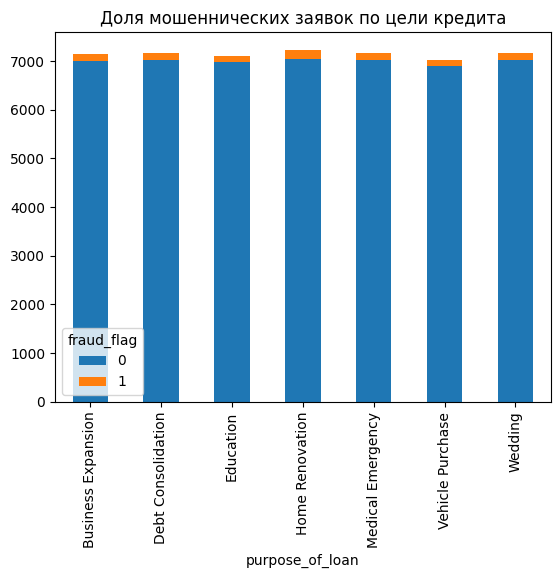

In [31]:
pd.crosstab(df1['purpose_of_loan'], df1['fraud_flag']).plot(kind='bar', stacked=True)
plt.title("Доля мошеннических заявок по цели кредита")
plt.show()

In [32]:
# Создаем DataFrame для хранения результатов
results = pd.DataFrame(columns=['Column', 'Correlation', 'P-value'])
for col in numeric_columns1:
    corr, p_value = pointbiserialr(df1['fraud_flag'], df1[col])
    results = pd.concat([results, pd.DataFrame({
        'Column': [col],
        'Correlation': [corr],
        'P-value': [p_value]
    })], ignore_index=True)

# Сортируем по абсолютной корреляции (убыванию)
results['Abs_Correlation'] = results['Correlation'].abs()
results = results.sort_values('Abs_Correlation', ascending=False).drop('Abs_Correlation', axis=1)

print(results)

                  Column  Correlation   P-value
0  loan_amount_requested    -0.005917  0.185789
6   debt_to_income_ratio     0.005644  0.206939
7          applicant_age     0.004846  0.278552
8   number_of_dependents    -0.004166  0.351607
3         monthly_income    -0.001949  0.662916
2  interest_rate_offered    -0.001440  0.747395
4            cibil_score     0.001095  0.806641
5  existing_emis_monthly    -0.000631  0.887763
1     loan_tenure_months    -0.000484  0.913827


/tmp/ipykernel_1306052/2569309451.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


In [33]:
from scipy.stats import chi2_contingency

In [34]:
# Создаем DataFrame для результатов
results = pd.DataFrame(columns=['Column', 'Cramers_V', 'P-value'])
for col in cat_columns1:
    # Строим таблицу сопряженности
    contingency_table = pd.crosstab(df1[col], df1['fraud_flag'])
    
    # Хи-квадрат тест
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Коэффициент V Крамера (нормированный хи-квадрат)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    # Записываем результаты
    results = pd.concat([results, pd.DataFrame({
        'Column': [col],
        'Cramers_V': [cramers_v],
        'P-value': [p]
    })], ignore_index=True)

# Сортируем по убыванию силы связи
results = results.sort_values('Cramers_V', ascending=False)
print(results)

                      Column  Cramers_V   P-value
5                loan_status   1.000000  0.000000
1            purpose_of_loan   0.018576  0.008397
2          employment_status   0.016371  0.019904
4                     gender   0.010696  0.057259
0                  loan_type   0.008406  0.472894
3  property_ownership_status   0.007092  0.284360


/tmp/ipykernel_1306052/3076462924.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


In [35]:
fraud_status_counts = df1[df1['fraud_flag'] == 1]['loan_status'].value_counts()
print(fraud_status_counts)

loan_status
Fraudulent - Detected      542
Fraudulent - Undetected    484
Name: count, dtype: int64


Оказалось, что в датасете loan_type меняют на тип - мошеннический, если заявка оказалась мошеннической

In [36]:
fraud_status_counts = df1[df1['fraud_flag'] == 1]['purpose_of_loan'].value_counts()
print(fraud_status_counts)

purpose_of_loan
Home Renovation       188
Wedding               152
Business Expansion    151
Debt Consolidation    148
Medical Emergency     136
Vehicle Purchase      126
Education             125
Name: count, dtype: int64


In [37]:
fraud_status_counts = df1[df1['fraud_flag'] == 1]['employment_status'].value_counts()
print(fraud_status_counts)

employment_status
Salaried          196
Self-Employed     192
Unemployed        183
Business Owner    159
Retired           151
Student           145
Name: count, dtype: int64


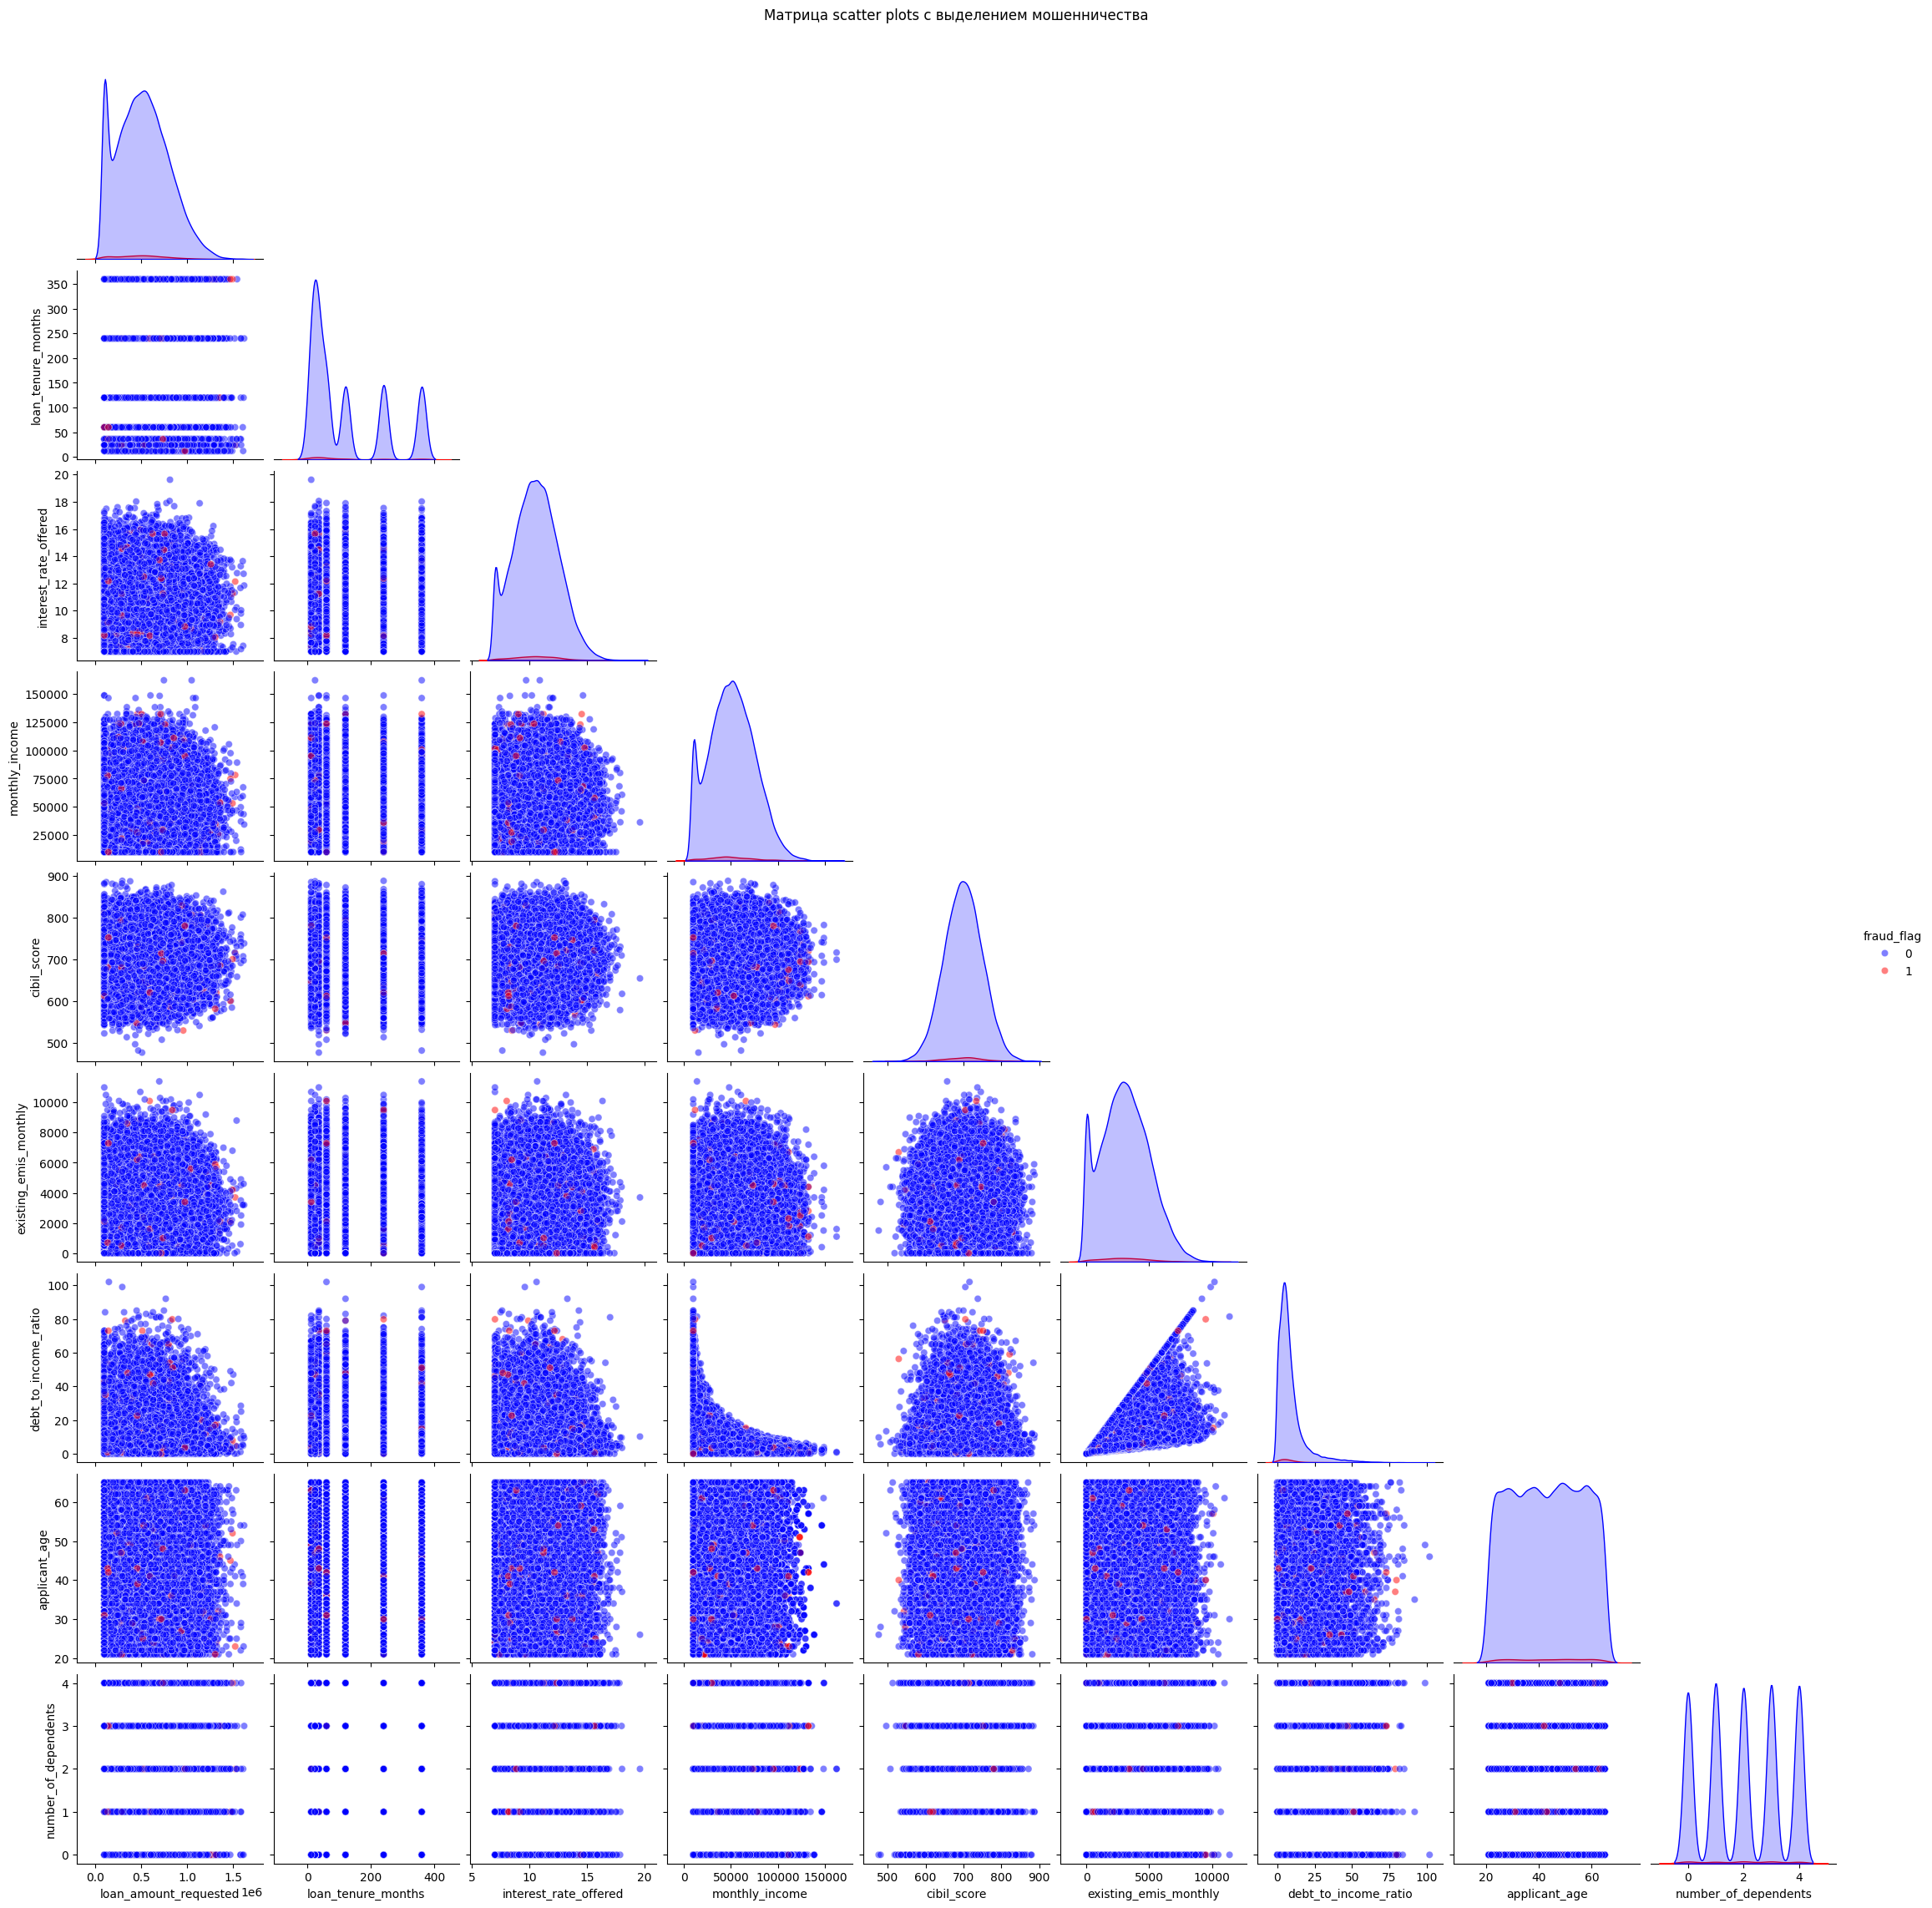

In [38]:
sns.pairplot(
    data=df1,
    vars=numeric_columns1,
    hue='fraud_flag',
    palette={0: 'blue', 1: 'red'},
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Матрица scatter plots с выделением мошенничества', y=1.02)
plt.show()